In [570]:
from importlib import reload
import matplotlib.pyplot as plt

In [571]:
import VAE
reload(VAE)
from VAE import *

In [572]:
Nz = 50
grid = np.linspace(0, 1, Nz)
dx = grid[1] - grid[0]
x = generate_leaks(grid, 1000, random_state=0)

In [573]:
net = VAE([Nz, 32, 16, 8, 4], [4, 8, 16, 32, Nz], dx, 'tanh', structure=True)
model = Model(x, net)
model.train(10000, val_interval=100)

step       loss       rec        reg
100        7.08e+00   6.84e+00   2.38e-01
200        5.88e+00   5.30e+00   5.79e-01
300        5.05e+00   4.28e+00   7.73e-01
400        4.34e+00   3.43e+00   9.09e-01
500        3.16e+00   2.06e+00   1.10e+00
600        2.57e+00   1.38e+00   1.20e+00
700        2.43e+00   1.24e+00   1.20e+00
800        2.37e+00   1.18e+00   1.19e+00
900        2.34e+00   1.15e+00   1.19e+00
1000       2.33e+00   1.13e+00   1.19e+00
1100       2.32e+00   1.12e+00   1.20e+00
1200       2.28e+00   1.10e+00   1.19e+00
1300       2.27e+00   1.08e+00   1.19e+00
1400       2.27e+00   1.07e+00   1.20e+00
1500       2.23e+00   1.04e+00   1.19e+00
1600       2.22e+00   1.03e+00   1.19e+00
1700       2.22e+00   1.03e+00   1.19e+00
1800       2.23e+00   1.05e+00   1.18e+00
1900       2.20e+00   1.01e+00   1.19e+00
2000       2.18e+00   9.80e-01   1.20e+00
2100       2.21e+00   1.02e+00   1.19e+00
2200       2.16e+00   9.71e-01   1.19e+00
2300       2.19e+00   1.00e+00   1.19e+

torch.Size([10, 50])
(10, 50)


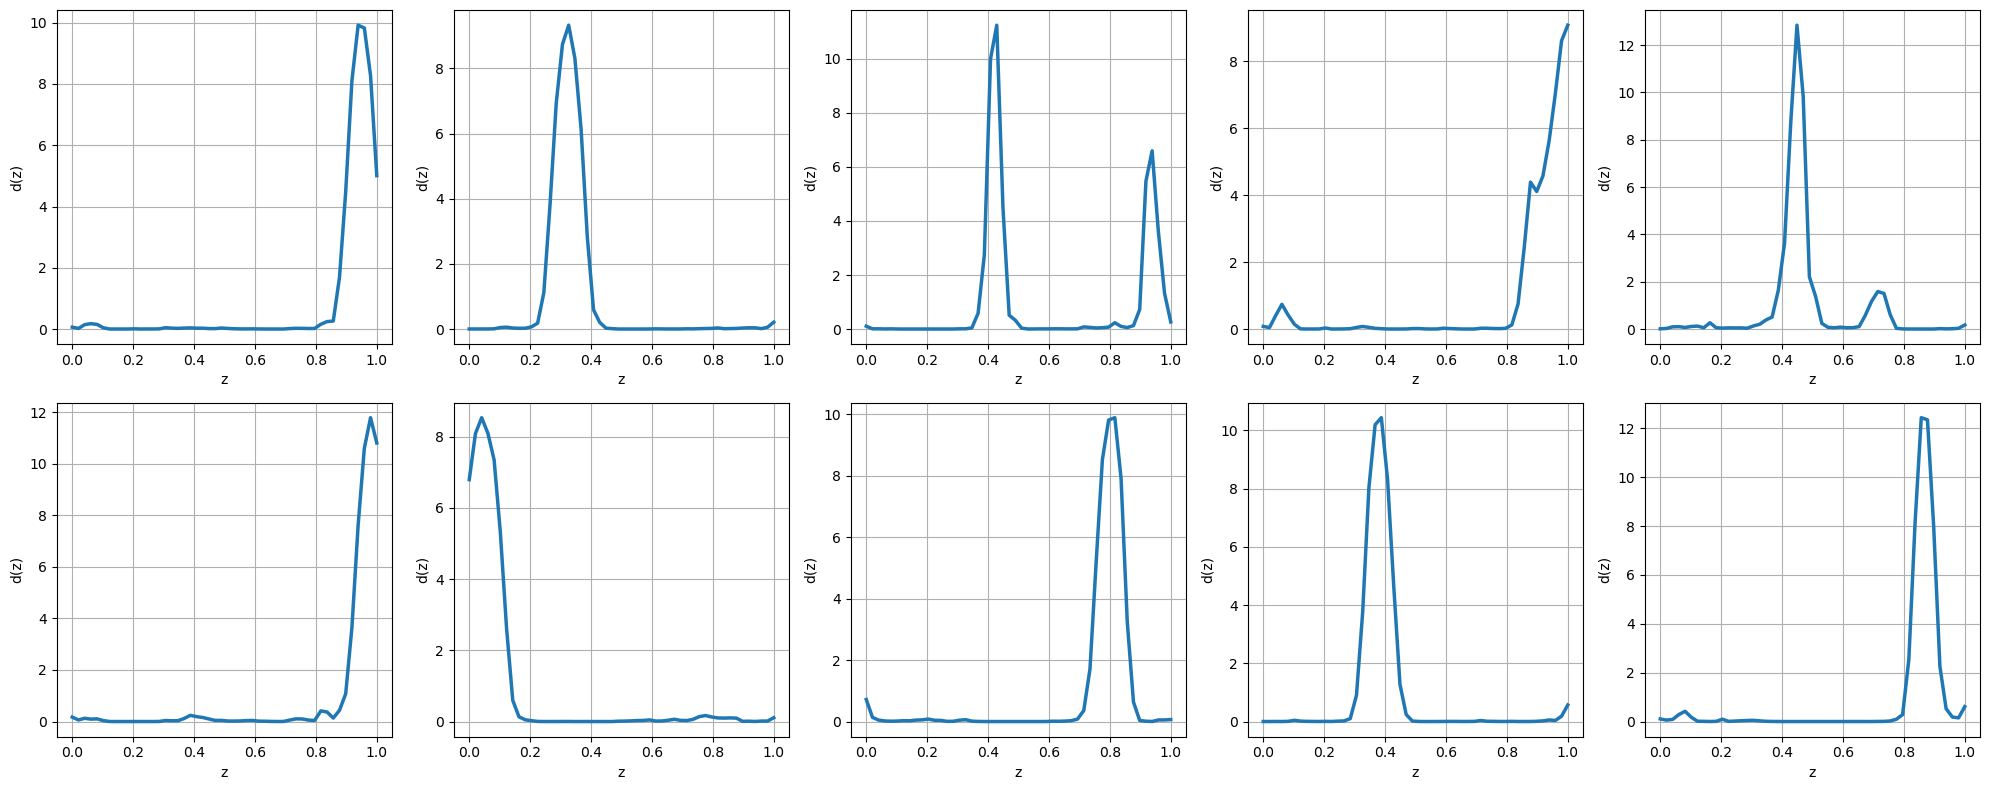

In [581]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows × 5 columns
axes = axes.flatten()

x = generate_leaks(grid, 10, random_state=3)


print(x.shape)

#z = model.net.encoder(x)[0]

z = torch.randn(10, 4)
x_hat = model.net.decoder(z).detach().numpy()


print(x_hat.shape)
#x_hat = model.net(x)[0].detach()


for j, ax in enumerate(axes):
    #ax.plot(grid, x[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.plot(grid, x_hat[j,:], label=f"Sample {j+1}", linewidth=2.5)
    ax.set_xlabel("z")
    ax.set_ylabel("d(z)")
    ax.grid(True)

plt.tight_layout()
plt.show()